Benjamin Katz<br>
Week 9<br>
March 27<br>
Part two: https://colab.research.google.com/drive/1MarOMJQTnnByYCrDyWcu2p_g1Q3n_xEM?usp=sharing
<br>
Big thanks to https://www.tensorflow.org/tutorials/generative/autoencoder, https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py, and Raschka

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
import keras
import tensorflow as tf


In [ ]:
import tensorflow_datasets as tfds
(X_training, y_training), (X_testing, y_testing) = tf.keras.datasets.mnist.load_data()
X_training=X_training.reshape(60000, 784)
print(X_training.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)


In [ ]:
#set up the tsne modle that will reduce the dementionality to 2 componenets 
#that can be graphed on a standard 2d xy axis
tsne = manifold.TSNE(
    n_components=2,
    init="random",
    random_state=0,
    #perplexity is set to 40, typically the higher the perplexity the better, but it is good to keep it below 50
    perplexity=40,
    n_iter=300,
)
#transform the data
Y = tsne.fit_transform(X_training)


(60000, 2)


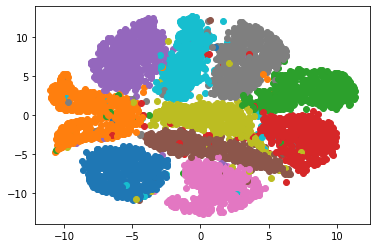

In [ ]:
#An array of 10 different colors so each digit can be categorized by a different color
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
print(Y.shape)
#Go through the first 6000(10%) of the data and graph it with the new transformed lower dimensionality. 
for i in range(6000):
  #set the color such that all zeros are blue and all ones are orange ect
  plt.scatter(Y[i][0],Y[i][1], c=colors[y_training[i]])
plt.show()

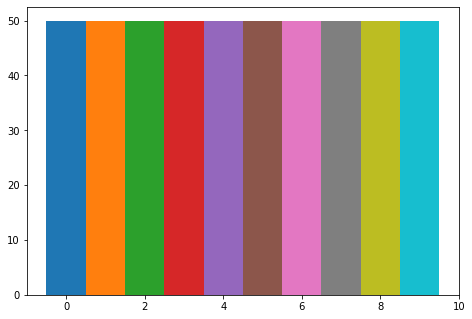

In [ ]:
#match the colors to a digit
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for i, color in enumerate(colors):
  ax.bar(i , 50, color = color, width = 1)


It seems like tSNE is very effective at reducing the dimensionality of the digits that originated with 784 dimensions to data with just two. The grouping is largly preserved with only a few outliers scattered about the graph. The dimensions that are output are not on their own very interesting, but, in realtion to the other data, it graphs similar images near each other. Not surprisingly, the digits that look similar are also graphed near each other. The four(purple) and nine(light blue) are very close to each other. The eight and five, etc.

**Part Two:** https://colab.research.google.com/drive/1MarOMJQTnnByYCrDyWcu2p_g1Q3n_xEM?usp=sharing